In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [4]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# upload datasets
train_df = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
test_df = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv")

# first 5 row
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
#data types and columns info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [11]:
#missing values
train_df.isnull().sum().sort_values(ascending=False)

Arrival Delay in Minutes             310
Unnamed: 0                             0
Online boarding                        0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Seat comfort                           0
Food and drink                         0
id                                     0
Gate location                          0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Customer Type                          0
Gender                                 0
satisfaction    

In [7]:
#numerical columns statistical sum
train_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [12]:
#Class counts of categorical columns
for col in categorical_cols:
    print(train_df[col].value_counts())

Gender
Female    52727
Male      51177
Name: count, dtype: int64
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64


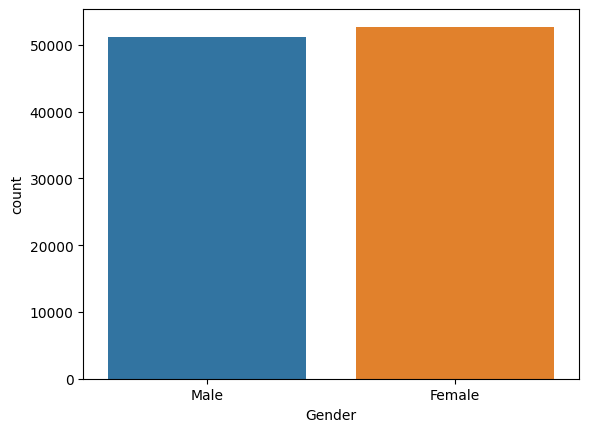

In [13]:
#Categorical variables(bar plot)
sns.countplot(data=train_df, x='Gender')
plt.show()

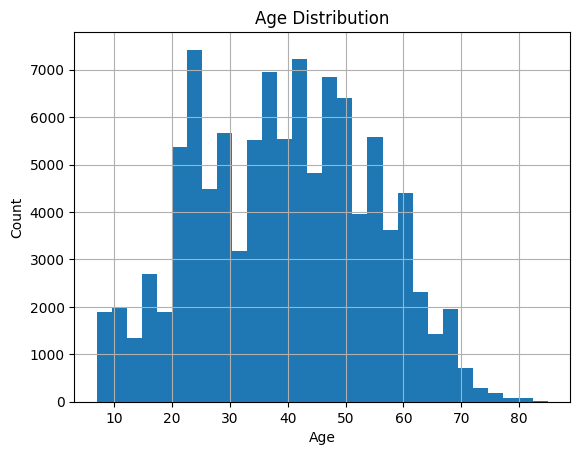

In [14]:
#numerical variables (histogram)
train_df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

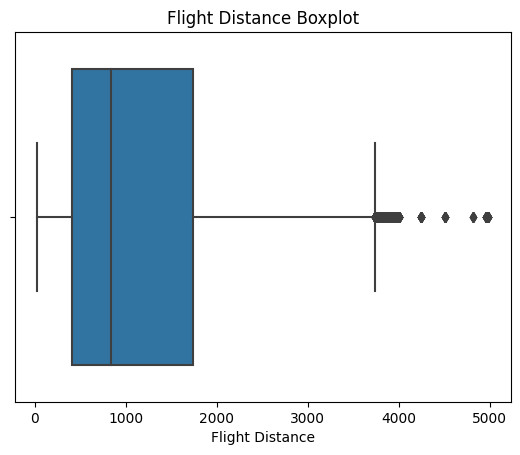

In [18]:
#Outlier Analyze
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['Flight Distance'])
plt.title('Flight Distance Boxplot')
plt.show()

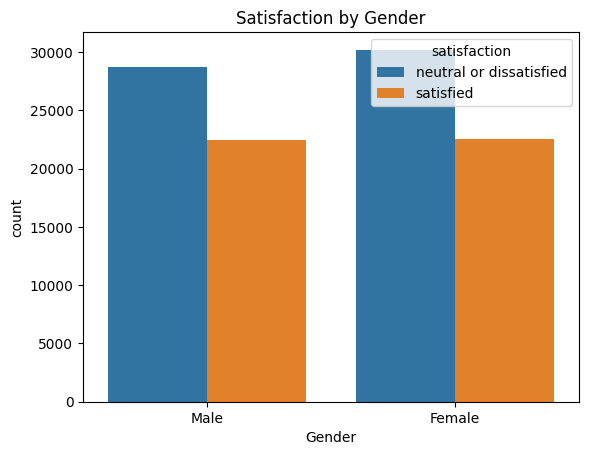

In [19]:
#Satisfaction regarding sex 
sns.countplot(data=train_df, x='Gender', hue='satisfaction')
plt.title('Satisfaction by Gender')
plt.show()

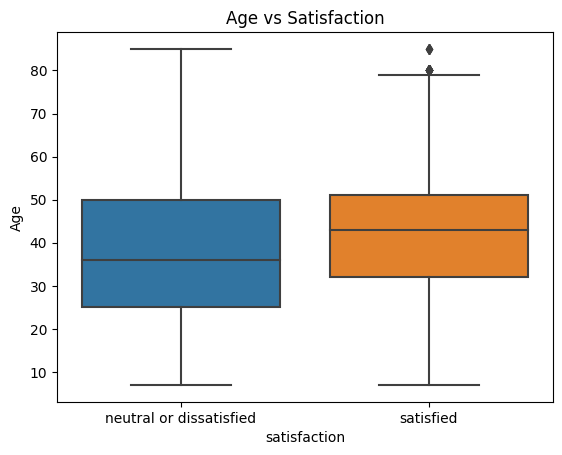

In [20]:
#Relation between age and satisfaction
sns.boxplot(data=train_df, x='satisfaction', y='Age')
plt.title('Age vs Satisfaction')
plt.show()

# Data Cleaning and Preprocessing********

In [24]:
#cleaning columns
train_df.drop(columns=['Unnamed: 0', 'id'], inplace=True, errors='ignore')

In [25]:
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for col in cat_cols:
    train_df[col] = train_df[col].astype('category')

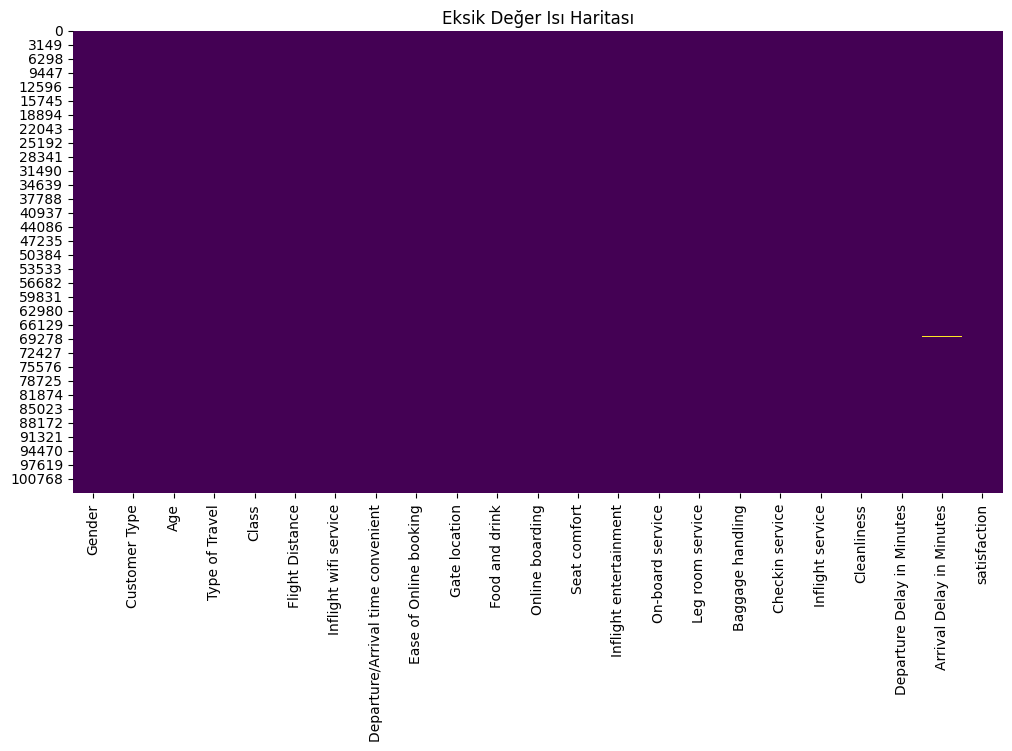

In [30]:
#missing value heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Eksik Değer Isı Haritası")
plt.show()

**"Arrival Delay in Minutes" column has missing values in only 0.3% of the rows, which corresponds to 310 records.******

In [34]:
# Filling with mean or median
train_df['Arrival Delay in Minutes'] = train_df['Arrival Delay in Minutes'].fillna(train_df['Arrival Delay in Minutes'].mean())

In [26]:
# Statistical summary for numerical columns.
train_df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [27]:
#Median value of each numerical column    
train_df.median(numeric_only=True)

Age                                   40.0
Flight Distance                      843.0
Inflight wifi service                  3.0
Departure/Arrival time convenient      3.0
Ease of Online booking                 3.0
Gate location                          3.0
Food and drink                         3.0
Online boarding                        3.0
Seat comfort                           4.0
Inflight entertainment                 4.0
On-board service                       4.0
Leg room service                       4.0
Baggage handling                       4.0
Checkin service                        3.0
Inflight service                       4.0
Cleanliness                            3.0
Departure Delay in Minutes             0.0
Arrival Delay in Minutes               0.0
dtype: float64

In [28]:
# Mean
print("Mean:\n", train_df.mean(numeric_only=True))

# Minimum
print("\nMinimum:\n", train_df.min(numeric_only=True))

# Maximum
print("\nMaximum:\n", train_df.max(numeric_only=True))

# Standard Deviation
print("\nStandard Deviation:\n", train_df.std(numeric_only=True))

Mean:
 Age                                    39.379706
Flight Distance                      1189.448375
Inflight wifi service                   2.729683
Departure/Arrival time convenient       3.060296
Ease of Online booking                  2.756901
Gate location                           2.976883
Food and drink                          3.202129
Online boarding                         3.250375
Seat comfort                            3.439396
Inflight entertainment                  3.358158
On-board service                        3.382363
Leg room service                        3.351055
Baggage handling                        3.631833
Checkin service                         3.304290
Inflight service                        3.640428
Cleanliness                             3.286351
Departure Delay in Minutes             14.815618
Arrival Delay in Minutes               15.178678
dtype: float64

Minimum:
 Age                                   7.0
Flight Distance                      31.0
I

In [29]:
# View statistical summary of numerical columns all together
summary_stats = train_df.describe().T  # Transposed for better readability
summary_stats['median'] = train_df.median(numeric_only=True)
summary_stats

,count,mean,std,min,25%,50%,75%,max,median
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0,40.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0,843.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0,3.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0,3.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0,3.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0,3.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0,3.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0,3.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0,4.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0,4.0


**AYKIRI DEĞER# **

In [40]:
# Select numerical columns
numeric_cols = train_df.select_dtypes(include=[np.number]).columns

# Apply IQR-based clipping for each numerical column
for col in numeric_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply clipping
    train_df[col] = train_df[col].clip(lower=lower_bound, upper=upper_bound)


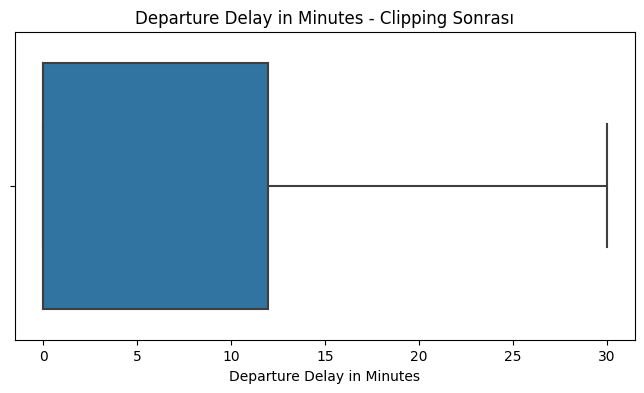

In [41]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=train_df['Departure Delay in Minutes'])
plt.title('Departure Delay in Minutes - Clipping Sonrası')
plt.show()

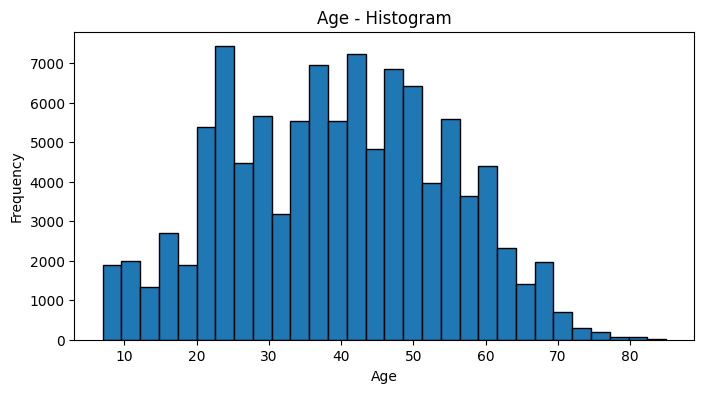

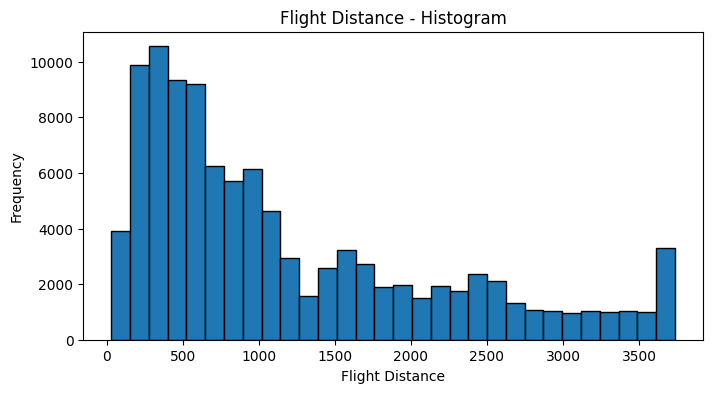

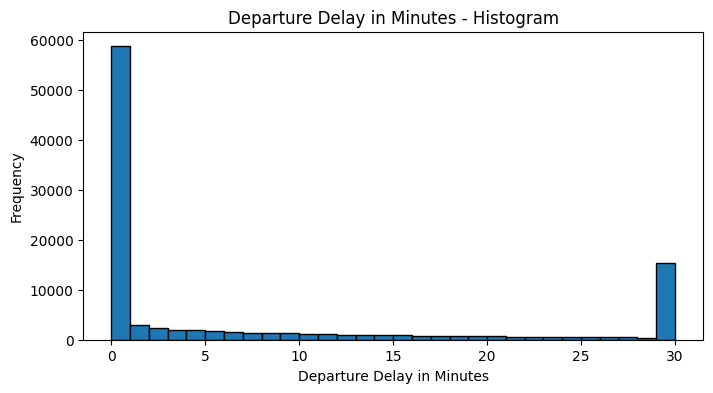

In [44]:
# Select numerical columns to visualize
numeric_cols_to_plot = ['Age', 'Flight Distance', 'Departure Delay in Minutes']

# Plot histograms
for col in numeric_cols_to_plot:
    plt.figure(figsize=(8, 4))
    plt.hist(train_df[col], bins=30, edgecolor='black')
    plt.title(f'{col} - Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



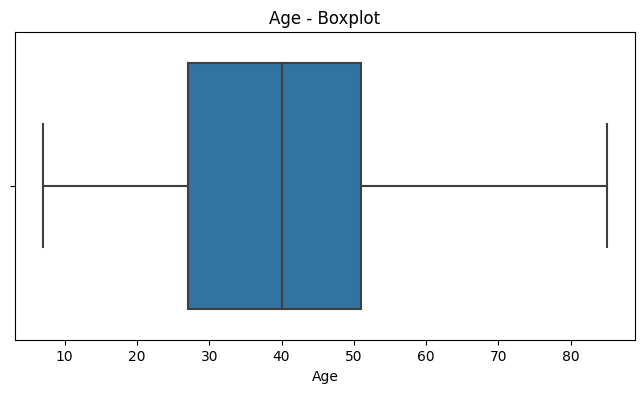

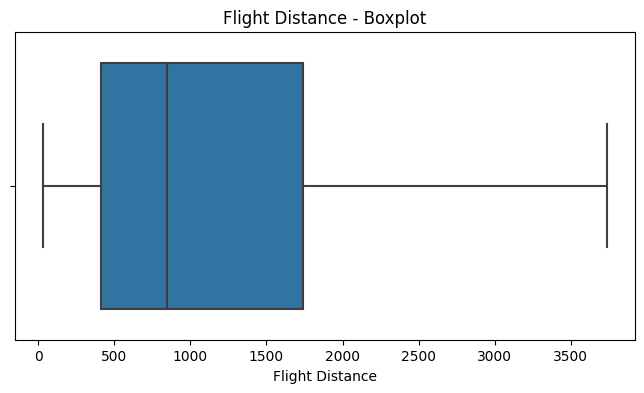

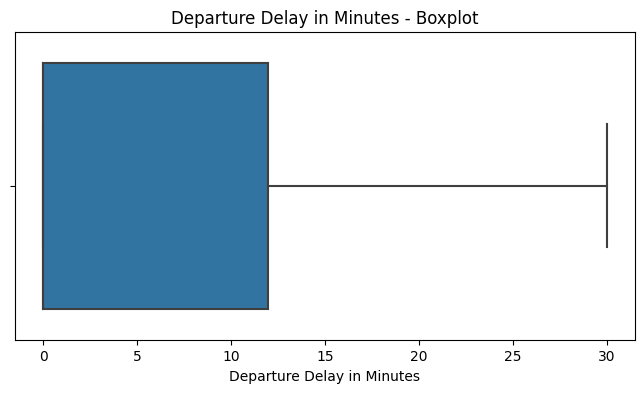

In [43]:
# Select numerical columns to visualize
numeric_cols_to_plot = ['Age', 'Flight Distance', 'Departure Delay in Minutes']
# Plot boxplots
for col in numeric_cols_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f'{col} - Boxplot')
    plt.xlabel(col)
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


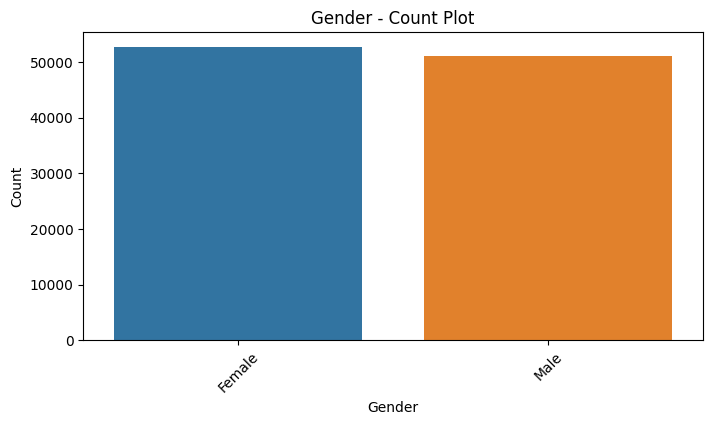

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


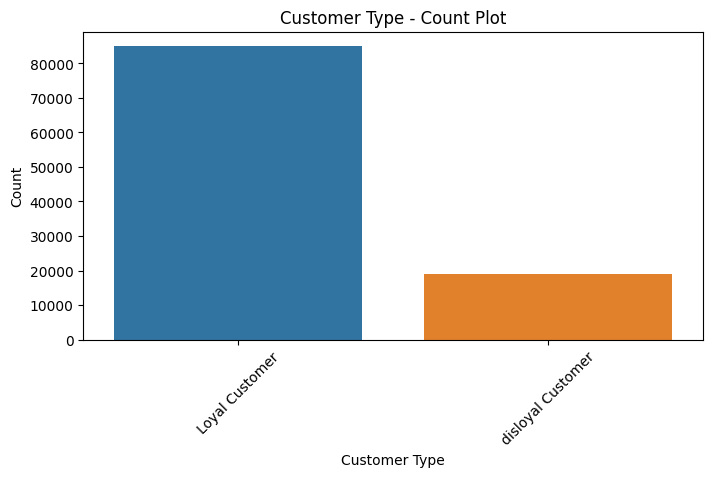

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


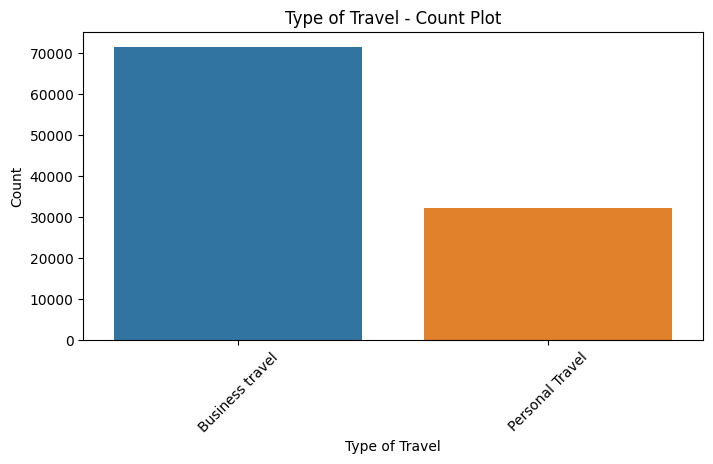

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


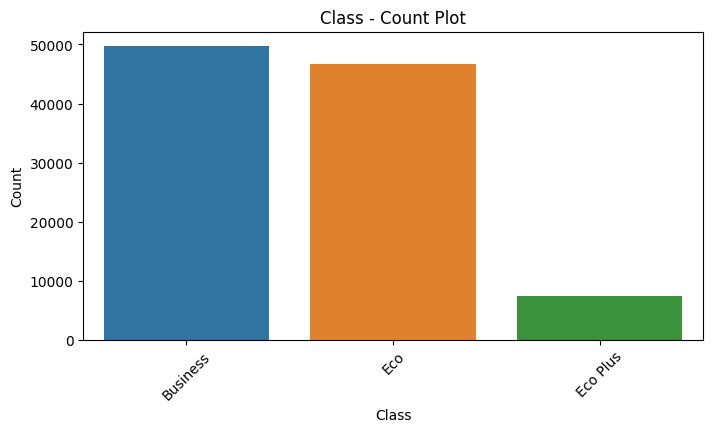

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


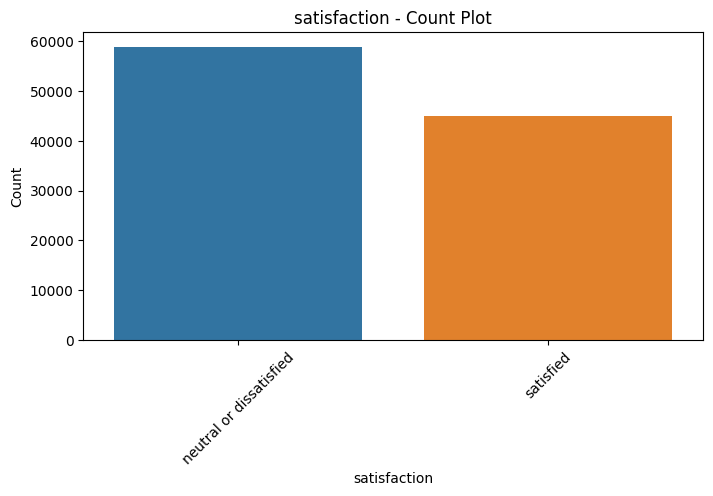

In [45]:
# Select categorical columns to visualize
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

# Plot count plots for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().index)
    plt.title(f'{col} - Count Plot')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

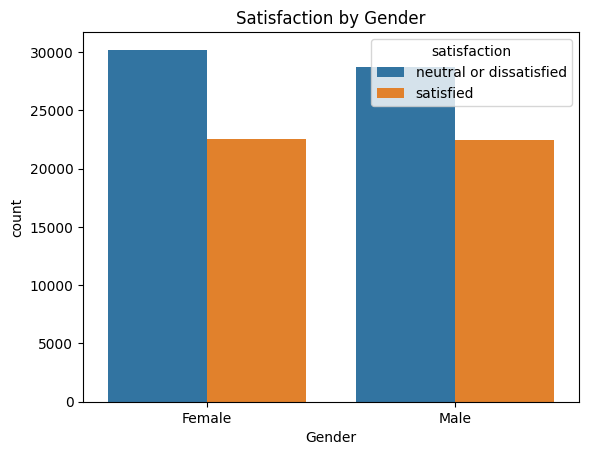

In [46]:
sns.countplot(data=train_df, x='Gender', hue='satisfaction')
plt.title('Satisfaction by Gender')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


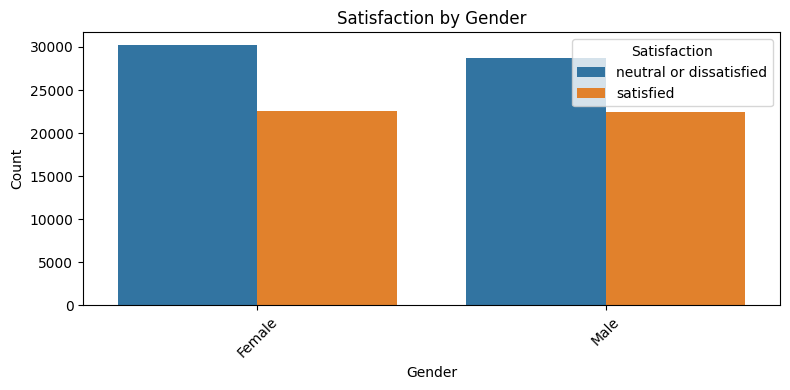

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


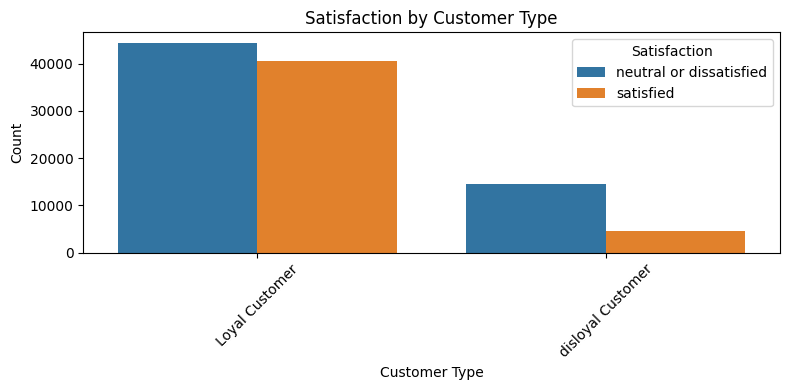

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


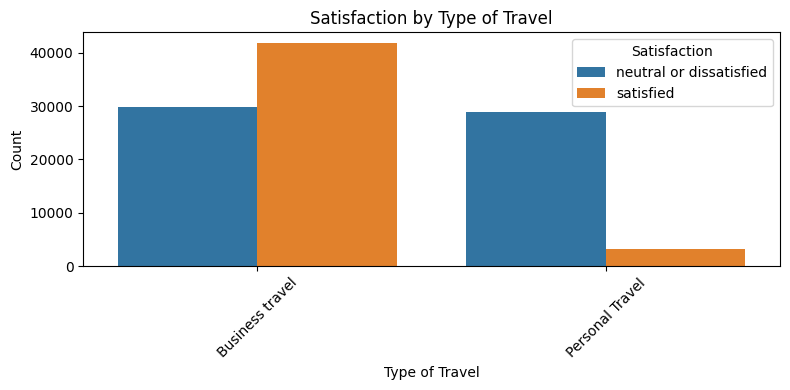

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


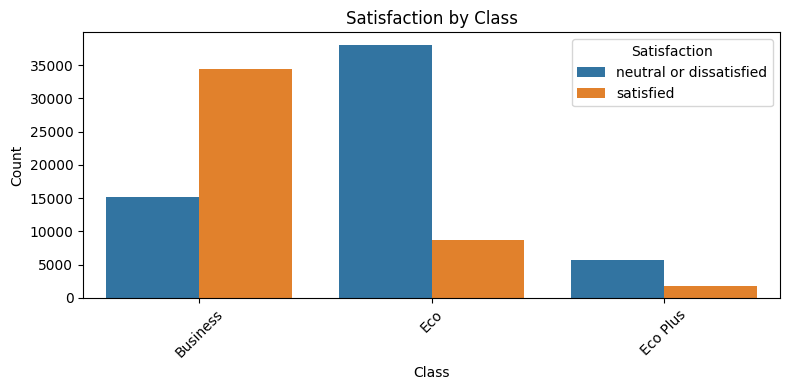

In [47]:
features_vs_satisfaction = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Plot count plots with hue='satisfaction'
for col in features_vs_satisfaction:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=col, hue='satisfaction', order=train_df[col].value_counts().index)
    plt.title(f'Satisfaction by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Satisfaction')
    plt.tight_layout()
    plt.show()